## Attendance code for today:  40872913

# Where are we?  Where are we going?

#### Python
- Arrays
- Loops
- Dataframes

Next: If statements (making decisions)

#### Data concepts
- simulation - sampling from a simulated world
  - Simulate one boy/girl child (50% chance of each)
  - Simulate one Swain juror (26% black, 74% white)
  - Simulate union and non-union workers at Fiat
- Take a sample by repeating
  - Y children
  - 12 jurors
  - The number of workers re-hired
- Simulate the 'no difference'/'fair' world
  - Boys and girls are equally likely
  - Jurors are picked according to their percentage in the community
  - Union and non-union workers are picked according to their percentage in the workforce

- Compare the **range** of results (a distribution) to the **actual** outcome
  - Did Henry VIII have an unusual number of female children?
  - Was the Swain jury selection fair?
  - Did Fiat discriminate against union workers?
  - **Visualize** the distribution from the 'fair' world and compare to the single real-world value
  - Was the real value unusual in the fair world?
- Calculate the probability of the real outcome in the fair world
    - Count the number of **simulated** juries with 0 black jurors
    - Divide by the total number of juries
    - Count the number of times 2 **or fewer** boys occur in **simulated** families with 15 children
    - Divide by the total number of families simulated

### The concepts here are very important.  We will repeat them in the rest of the course

### Mid-module review results

- What you liked
  - Exercises on vlab
  - Interactive sessions (live coding)
  - Resources and textbook
  - The pace

- What you didn't like
  - Time to set up at the beginning of lectures
  - Finding a group for the project
  - The rooms are hard to do interactive work in
  - The pace (too slow and too fast)
  - Talking in class
  - Not fully understanding or feeling lost

- Suggestions
  - Interactive activities
  - Pre-allocate project groups
  - More challenging content for more advanced students
  - More practicing in lectures
  - Less lecture, more workshop
  - Drop-in sessions

### What can we change?

- More interactive sessions - less lecture/more workshop
  - Slower, so more material will need to be done independently outside of class
  - Need good ways to interact (vevox?)
  - Some working time, some lecture
- Project groups
  - For people who want to be assigned I can assign some groups
  - Send me a request to be assigned

- Setup time
  - Computer problems - hopefully solved this week?
  - 6-8 weeks to replace a computer
- Challenging material
  - Material gets more challenging now
  - Projects can take on challenge
  - Increasing work will be necessary on projects
- Drop in sessions
  - There will be more
  - NOTE HOWEVER - 1st drop-in had 4 teaching staff (me + 3 TA) and 2 students
    - This did not indicate a high level of **actual** interest

- Talking in class
  - Balance between interactivity and lecture
  - BUT when we are doing lecture, need to be aware of other students
- I will cover fewer historical data scientists, but not eliminate all together
- More information about the project format and marking criteria will come
  - We have presented basic information
  - More details will come shortly
  - I didn't ask about this, but the other survey will have done.

### What can't we change
- The room
  - Computer rooms are not large enough, except for the CTL
  - The CTL was worse - 2 separate rooms
  - There are benefits to working on your own laptops rather than sitting behind machines
  - Constant challenge as class size has grown
- More sessions
  - Sessions numbers are organized at the beginning and constrained by staffing

- Many individual help sessions
  - I do encourage students to ask me questions
  - I can meet with students
  - I can't provide many individual sessions - the class is too large
  - Note, however, that piazza has been somewhat underutilized
  - Interactivity may help
  - Does vevox help encourage questions?

### Pandas

#### Putting pandas to use

- Selecting data
- Sorting
- Summarizing
- Plotting

### Who has more fat? McDonalds or Starbucks

Read in the menu data - the file is: ```McD_vs_StarB_menus.csv```

Extract all of the McDonalds values for one category (which column name has 'Calories')?

    Try Calories. Then you could try Fat, Carbs, Fiber, Protein
    Plot the distribution for the McDonalds values

Extract all of the Starbucks values for the same category

    Plot the distribution for the Starbucks values

Which fast food provider has higher values?

    Does the shape of the distribution have things that are important to notice?


### Read in the data

In [1]:
# read in the data here
import pandas as pd # load the usual suspects
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

# read in the menu data and check that it looks OK
sb_vs_mac = pd.read_csv("McD_vs_StarB_menus.csv")
sb_vs_mac.head()

,Restaurant,Menu_Item,Calories,Fat,Carbs,Fiber,Protein
0,Starbucks,Chonga Bagel,300,5.0,50,3,12
1,Starbucks,8-Grain Roll,380,6.0,70,7,10
2,Starbucks,Almond Croissant,410,22.0,45,3,10
3,Starbucks,Apple Fritter,460,23.0,56,2,7
4,Starbucks,Banana Nut Bread,420,22.0,52,2,6


In [2]:
sb_vs_mac.tail()


,Restaurant,Menu_Item,Calories,Fat,Carbs,Fiber,Protein
368,McDonalds,McFlurry with Oreo Cookies (Small),510,17.0,80,1,12
369,McDonalds,McFlurry with Oreo Cookies (Medium),690,23.0,106,1,15
370,McDonalds,McFlurry with Oreo Cookies (Snack),340,11.0,53,1,8
371,McDonalds,McFlurry with Reese's Peanut Butter Cups (Medium),810,32.0,114,2,21
372,McDonalds,McFlurry with Reese's Peanut Butter Cups (Snack),410,16.0,57,1,10


In [3]:
sb_vs_mac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  373 non-null    object 
 1   Menu_Item   373 non-null    object 
 2   Calories    373 non-null    int64  
 3   Fat         373 non-null    float64
 4   Carbs       373 non-null    int64  
 5   Fiber       373 non-null    int64  
 6   Protein     373 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 20.5+ KB


### Select the McDonalds fat values

In [8]:
is_mac = sb_vs_mac["Restaurant"] == "McDonalds"
is_sb = sb_vs_mac["Restaurant"] == "Starbucks"
is_sb

0       True
1       True
2       True
3       True
4       True
       ...  
368    False
369    False
370    False
371    False
372    False
Name: Restaurant, Length: 373, dtype: bool

In [13]:
mac_df = sb_vs_mac[is_mac].copy()
mac_df.reset_index(inplace = True)
mac_df.head()

,index,Restaurant,Menu_Item,Calories,Fat,Carbs,Fiber,Protein
0,113,McDonalds,Egg McMuffin,300,13.0,31,4,17
1,114,McDonalds,Egg White Delight,250,8.0,30,4,18
2,115,McDonalds,Sausage McMuffin,370,23.0,29,4,14
3,116,McDonalds,Sausage McMuffin with Egg,450,28.0,30,4,21
4,117,McDonalds,Sausage McMuffin with Egg Whites,400,23.0,30,4,21


In [14]:
mac_fat = mac_df["Fat"].copy()
mac_fat

0      13.0
1       8.0
2      23.0
3      28.0
4      23.0
       ... 
255    17.0
256    23.0
257    11.0
258    32.0
259    16.0
Name: Fat, Length: 260, dtype: float64

### Select the Starbucks fat values

In [15]:
# select the Starbucks fat values here
sb_df = sb_vs_mac[is_sb].copy()
sb_df.reset_index(inplace = True)
sb_df.head()

,index,Restaurant,Menu_Item,Calories,Fat,Carbs,Fiber,Protein
0,0,Starbucks,Chonga Bagel,300,5.0,50,3,12
1,1,Starbucks,8-Grain Roll,380,6.0,70,7,10
2,2,Starbucks,Almond Croissant,410,22.0,45,3,10
3,3,Starbucks,Apple Fritter,460,23.0,56,2,7
4,4,Starbucks,Banana Nut Bread,420,22.0,52,2,6


In [17]:
sb_fat = sb_df["Fat"].copy()
sb_fat

0       5.0
1       6.0
2      22.0
3      23.0
4      22.0
       ... 
108    14.0
109    18.0
110    13.0
111     8.0
112     0.0
Name: Fat, Length: 113, dtype: float64

### Plot the two sets of fat values -- How do you want the plot to look?

(array([133.,  74.,  39.,   7.,   4.,   2.,   0.,   0.,   0.,   1.]),
 array([  0. ,  11.8,  23.6,  35.4,  47.2,  59. ,  70.8,  82.6,  94.4,
        106.2, 118. ]),
 <BarContainer object of 10 artists>)

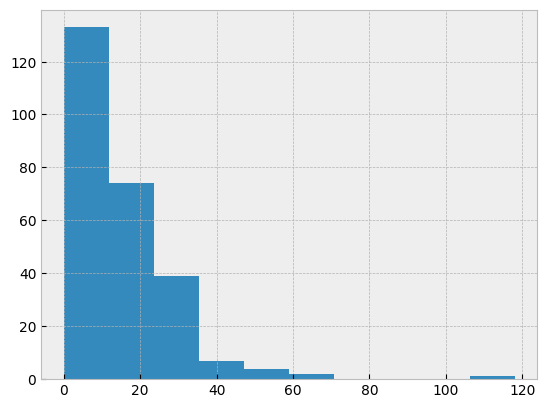

In [18]:
# experiment with some plots here
plt.hist(mac_fat)

(array([10., 10., 12., 12., 25., 14., 13., 14.,  2.,  1.]),
 array([ 0. ,  3.7,  7.4, 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 33.3, 37. ]),
 <BarContainer object of 10 artists>)

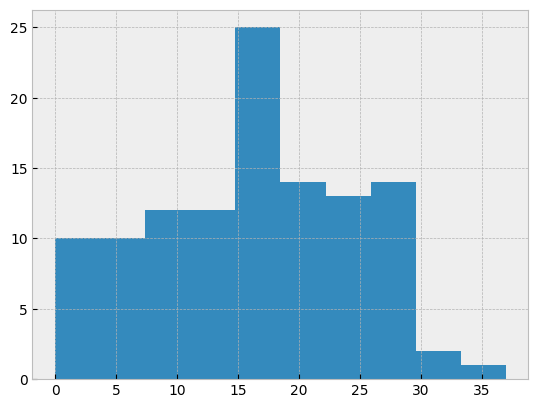

In [19]:
plt.hist(sb_fat)

Text(0, 0.5, 'Count')

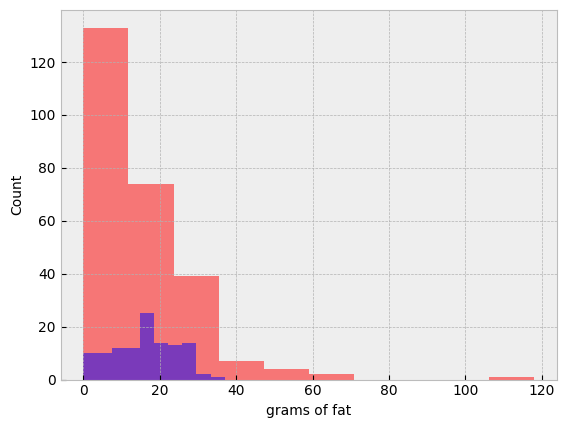

In [21]:
plt.hist(mac_fat,alpha=0.5,color="red")
plt.hist(sb_fat,alpha=0.5,color="blue")
plt.xlabel("grams of fat")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

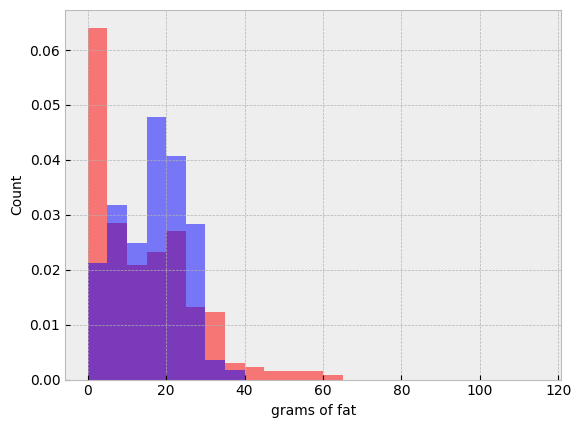

In [26]:
my_bins = np.arange(0,120,5)
plt.hist(mac_fat,alpha=0.5,color="red",bins=my_bins,density=True)
plt.hist(sb_fat,alpha=0.5,color="blue",bins=my_bins,density=True)
plt.xlabel("grams of fat")
plt.ylabel("Count")

In [33]:
is_low_fat = mac_df["Fat"] == 0
mac_df[is_low_fat]

,index,Restaurant,Menu_Item,Calories,Fat,Carbs,Fiber,Protein
100,213,McDonalds,Side Salad,20,0.0,4,1,1
101,214,McDonalds,Apple Slices,15,0.0,4,0,0
110,223,McDonalds,Coca-Cola Classic (Small),140,0.0,39,0,0
111,224,McDonalds,Coca-Cola Classic (Medium),200,0.0,55,0,0
112,225,McDonalds,Coca-Cola Classic (Large),280,0.0,76,0,0
113,226,McDonalds,Coca-Cola Classic (Child),100,0.0,28,0,0
114,227,McDonalds,Diet Coke (Small),0,0.0,0,0,0
115,228,McDonalds,Diet Coke (Medium),0,0.0,0,0,0
116,229,McDonalds,Diet Coke (Large),0,0.0,0,0,0
117,230,McDonalds,Diet Coke (Child),0,0.0,0,0,0


In [34]:
not_low_fat = mac_df["Fat"] != 0
new_mac_df = mac_df[not_low_fat].copy()
new_mac_df

,index,Restaurant,Menu_Item,Calories,Fat,Carbs,Fiber,Protein
0,113,McDonalds,Egg McMuffin,300,13.0,31,4,17
1,114,McDonalds,Egg White Delight,250,8.0,30,4,18
2,115,McDonalds,Sausage McMuffin,370,23.0,29,4,14
3,116,McDonalds,Sausage McMuffin with Egg,450,28.0,30,4,21
4,117,McDonalds,Sausage McMuffin with Egg Whites,400,23.0,30,4,21
...,...,...,...,...,...,...,...,...
255,368,McDonalds,McFlurry with Oreo Cookies (Small),510,17.0,80,1,12
256,369,McDonalds,McFlurry with Oreo Cookies (Medium),690,23.0,106,1,15
257,370,McDonalds,McFlurry with Oreo Cookies (Snack),340,11.0,53,1,8
258,371,McDonalds,McFlurry with Reese's Peanut Butter Cups (Medium),810,32.0,114,2,21


Text(0, 0.5, 'Count')

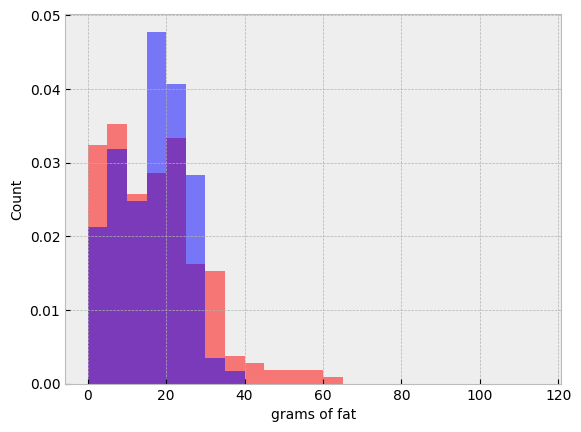

In [35]:
new_mac_fat = new_mac_df["Fat"]
my_bins = np.arange(0,120,5)
plt.hist(new_mac_fat,alpha=0.5,color="red",bins=my_bins,density=True)
plt.hist(sb_fat,alpha=0.5,color="blue",bins=my_bins,density=True)
plt.xlabel("grams of fat")
plt.ylabel("Count")

### What do you notice?

In [ ]:
# do you want to do something else?

### How would you test whether one restaurant has a fattier menu?

# Permutation test: Another simulation test
# -Mosquitoes and beer-
# Are you more attractive to malaria mosquitoes after a beer? 
### (Remember this? - see video from the beginning of class - week 1, session 2)

Mosquitoes and beer experiment

- Put one person in a tent to capture odor from breath and body
- Open the other tent to the outside air
- Draw air from these two sources into boxes at the end of a Y-junction
- Release mosquitos
- Do they go left to the box connected to the person?
- Do they go right to the box connected to outside air?

Experimental design:
- Do this once before drinking anything (control condition)
- Do this again after drinking either beer or water (experimental condition)

# Experimental setup

<img src="AnnotatedExpSetup.png"/>

## Data Wrangling

These are the real data.  The video presented simplified data that were already pre-processed

Here we give an example of some data understanding and data wrangling problems

Then we do our first permutation test

### Data

Data are in 'mosquito_beer.csv'
<br>  

Let's read in the data...

In [2]:
mozzie_data = pd.read_csv("mosquito_beer.csv")
mozzie_data.info() # shows information about columns and column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volunteer     86 non-null     object 
 1   group         86 non-null     object 
 2   test          86 non-null     object 
 3   nb_released   86 non-null     int64  
 4   no_odour      86 non-null     int64  
 5   volunt_odour  86 non-null     int64  
 6   activated     86 non-null     int64  
 7   co2no         81 non-null     float64
 8   co2od         80 non-null     float64
 9   temp          82 non-null     float64
 10  trapside      86 non-null     object 
 11  datetime      86 non-null     object 
dtypes: float64(3), int64(4), object(5)
memory usage: 8.2+ KB


In [3]:
# we should also check that data seem to have been read in ok
mozzie_data.head()

,volunteer,group,test,nb_released,no_odour,volunt_odour,activated,co2no,co2od,temp,trapside,datetime
0,subj1,beer,before,50,7,9,16,305.0,321.0,36.1,A,2007-08-28 19:00:00
1,subj2,beer,before,50,26,7,33,338.0,720.0,35.3,B,2007-08-28 21:00:00
2,subj3,beer,before,50,5,10,15,348.0,355.0,36.1,B,2007-09-15 19:00:00
3,subj4,beer,before,50,3,7,10,349.0,437.0,35.6,A,2007-09-25 17:00:00
4,subj5,beer,before,50,2,8,10,396.0,475.0,37.0,B,2007-09-25 18:00:00


### You need to know about what is in each column
#### consult the source of the data...

- group: beer/water
- test: before/after
- no_odour: air trap
- volunt_odour: person trap
- activated: number of mosquitoes that went towards the traps

### What measure are we interested in?

### Possible  measure

- % of activated mozzies that went toward the volunteer rather than open air
- Take difference between beer/water  


In [4]:
# Calculate the % of activated mozzies that went to the volunteer

# calculate percent
mozzie_data['percent_act_person'] = mozzie_data['volunt_odour']/mozzie_data['activated']

# Make a data frame with just the values we are interested in.  
# select columns
new_moz_data = mozzie_data[['volunteer','group','test',
                            'no_odour','volunt_odour',
                            'activated','percent_act_person']].copy()
# check the result
new_moz_data.head()

,volunteer,group,test,no_odour,volunt_odour,activated,percent_act_person
0,subj1,beer,before,7,9,16,0.562500
1,subj2,beer,before,26,7,33,0.212121
2,subj3,beer,before,5,10,15,0.666667
3,subj4,beer,before,3,7,10,0.700000
4,subj5,beer,before,2,8,10,0.800000


## What about the before/after column?  What is that?  Why is it there?

- People may differ in how much they attract mosquitos even without drink
- What can you do about that?
<br>

- Remember we would like a single value that tells us about how attractive a person is after they have had either beer or water

### If 'drink' changes preference, then % of activated  mozzies should increase in the 'after' condition
### If 'beer' changes the preference more, then the _increase_ should be bigger for beer compared to water
<br>

What do we need?
- before % for people who will drink water
- after % for people who will drink water
- calculate the difference (after % - before %)
- same for beer people
<br>

- Is the before/after difference bigger for beer?

###  How would you do that?

### You may want to investigate the pandas function 'merge'

- Merge is a fundamental database operation
- It is frequently used to put datasets together when there is a column that links them
  - E.g. one dataset has lung cancer by region
  - Another dataset has air pollution by region
  - Region is shared
  - Combine the data so lung cancer and air pollution are present for each region